<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><img href="http://www.datascience-paris-saclay.fr" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" ></td>
    <td style="background-color:transparent;"><img href="https://research.pasteur.fr/en/team/group-roberto-toro" src="https://paris-saclay-cds.github.io/autism_challenge/images/institut_pasteur_logo.svg" ></td>
    <td style="background-color:black;"><img href="fer.unizg.hr" src="https://www.fer.unizg.hr/_pub/themes_static/fer2016/default/img/FER_logo.png"></td>
  </tr>
</table> 
</div>

<center><h1>Impact of sMRI preprocessing on autism classification using machine learning methods</h1></center>



<center><h3>Forked from data challenge on Autism Spectrum Disorder detection</h3></center>
<br/>
<center>_Roberto Toro (Institut Pasteur), Nicolas Traut (Institut Pasteur), Anita Beggiato (Institut Pasteur), Katja Heuer (Institut Pasteur),<br /> Gael Varoquaux (Inria, Parietal), Alex Gramfort (Inria, Parietal), Balazs Kegl (LAL),<br /> Guillaume Lemaitre (CDS), Alexandre Boucaud (CDS), and Joris van den Bossche (CDS)<br />Lana Barić(FER), Roko Krstičević(FER)</center>

## Table of Content

0. [Prerequisites](#Software-prerequisites)
1. [Introduction about the competition](#Introduction:-what-is-this-challenge-about)
3. [The data](#The-data)
4. [Workflow](#Workflow)
5. [Evaluation](#Evaluation)
6. [Submission](#Submitting-to-the-online-challenge:-ramp.studio)
7. [More information](#More-information)
8. [Questions](#Question)

**To download and run this notebook**: download the [full starting kit](https://github.com/ramp-kits/autism/archive/master.zip), with all the necessary files.

## Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `nilearn`
* `jupyter`
* `ramp-workflow`

The following 2 cells will install if necessary the missing dependencies.

In [156]:
# import sys
# !{sys.executable} -m pip install scikit-learn==0.21.3 seaborn==0.10.0 nilearn==0.7.1

Install `ramp-workflow` from the master branch on GitHub.

In [157]:
# !{sys.executable} -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/0.2.1

In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction: detecting autism

Autism spectrum disorder (ASD) is a developmental disorder affecting communication and behavior with different range in severity of symptoms. ASD has been reported to affect approximately 1 in 166 children.

Although there is a consensus on a relation between ASD and atypical brain networks and anatomy, those differences in brain anatomy and functional connectivity remain unclear. To address these issues, study on large cohort of subjects are necessary to ensure relevant finding. 

## The data
We start from downloading data from internet

In [159]:
from problem import get_train_data

data_train = get_train_data()

In [160]:
data_train

,participants_site,participants_sex,participants_age,participants_asd,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,...,fmri_basc064,fmri_basc122,fmri_basc197,fmri_craddock_scorr_mean,fmri_harvard_oxford_cort_prob_2mm,fmri_motions,fmri_msdl,fmri_power_2011,fmri_select,repetition_time
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,5,F,9.301370,0,977.0,427.0,1884.0,1449.0,463.0,2790.0,...,./data/fmri/basc064/1932355398536124106/run_1/...,./data/fmri/basc122/1932355398536124106/run_1/...,./data/fmri/basc197/1932355398536124106/run_1/...,./data/fmri/craddock_scorr_mean/19323553985361...,./data/fmri/harvard_oxford_cort_prob_2mm/19323...,./data/fmri/motions/1932355398536124106/run_1/...,./data/fmri/msdl/1932355398536124106/run_1/193...,./data/fmri/power_2011/1932355398536124106/run...,1,2.5
5174041730092253771,19,M,29.000000,0,1279.0,730.0,2419.0,1611.0,467.0,3562.0,...,./data/fmri/basc064/5174041730092253771/run_1/...,./data/fmri/basc122/5174041730092253771/run_1/...,./data/fmri/basc197/5174041730092253771/run_1/...,./data/fmri/craddock_scorr_mean/51740417300922...,./data/fmri/harvard_oxford_cort_prob_2mm/51740...,./data/fmri/motions/5174041730092253771/run_1/...,./data/fmri/msdl/5174041730092253771/run_1/517...,./data/fmri/power_2011/5174041730092253771/run...,1,3.0
10219322676643534800,19,F,45.000000,1,926.0,446.0,1897.0,2135.0,570.0,3064.0,...,./data/fmri/basc064/10219322676643534800/run_1...,./data/fmri/basc122/10219322676643534800/run_1...,./data/fmri/basc197/10219322676643534800/run_1...,./data/fmri/craddock_scorr_mean/10219322676643...,./data/fmri/harvard_oxford_cort_prob_2mm/10219...,./data/fmri/motions/10219322676643534800/run_1...,./data/fmri/msdl/10219322676643534800/run_1/10...,./data/fmri/power_2011/10219322676643534800/ru...,1,3.0
10645466564919190227,5,F,9.216438,1,983.0,588.0,2479.0,1312.0,525.0,3766.0,...,./data/fmri/basc064/10645466564919190227/run_1...,./data/fmri/basc122/10645466564919190227/run_1...,./data/fmri/basc197/10645466564919190227/run_1...,./data/fmri/craddock_scorr_mean/10645466564919...,./data/fmri/harvard_oxford_cort_prob_2mm/10645...,./data/fmri/motions/10645466564919190227/run_1...,./data/fmri/msdl/10645466564919190227/run_1/10...,./data/fmri/power_2011/10645466564919190227/ru...,1,2.5
14512541342641936232,28,M,15.050000,1,1488.0,593.0,2309.0,1829.0,726.0,3720.0,...,./data/fmri/basc064/14512541342641936232/run_1...,./data/fmri/basc122/14512541342641936232/run_1...,./data/fmri/basc197/14512541342641936232/run_1...,./data/fmri/craddock_scorr_mean/14512541342641...,./data/fmri/harvard_oxford_cort_prob_2mm/14512...,./data/fmri/motions/14512541342641936232/run_1...,./data/fmri/msdl/14512541342641936232/run_1/14...,./data/fmri/power_2011/14512541342641936232/ru...,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14661172306020020468,3,F,46.430000,0,813.0,544.0,2499.0,1357.0,617.0,3346.0,...,./data/fmri/basc064/14661172306020020468/run_1...,./data/fmri/basc122/14661172306020020468/run_1...,./data/fmri/basc197/14661172306020020468/run_1...,./data/fmri/craddock_scorr_mean/14661172306020...,./data/fmri/harvard_oxford_cort_prob_2mm/14661...,./data/fmri/motions/14661172306020020468/run_1...,./data/fmri/msdl/14661172306020020468/run_1/14...,./data/fmri/power_2011/14661172306020020468/ru...,1,2.7
1061335839335536120,1,M,7.537303,1,1373.0,683.0,1691.0,1315.0,364.0,3137.0,...,./data/fmri/basc064/1061335839335536120/run_1/...,./data/fmri/basc122/1061335839335536120/run_1/...,./data/fmri/basc197/1061335839335536120/run_1/...,./data/fmri/craddock_scorr_mean/10613358393355...,./data/fmri/harvard_oxford_cort_prob_2mm/10613...,./data/fmri/motions/1061335839335536120/run_1/...,./data/fmri/msdl/1061335839335536120/run_1/106...,./data/fmri/power_2011/1061335839335536120/run...,0,2.0
7789126193351344754,12,M,14.083333,0,1107.0,518.0,2649.0,1856.0

In [161]:
print(data_train['participants_asd'])

subject_id
1932355398536124106     0
5174041730092253771     0
10219322676643534800    1
10645466564919190227    1
14512541342641936232    1
                       ..
14661172306020020468    0
1061335839335536120     1
7789126193351344754     0
9057622900394015793     1
10099127552657342413    0
Name: participants_asd, Length: 1127, dtype: int64


In [162]:
print('Number of subjects in the training tests: {}'.format(data_train['participants_asd'].size))

Number of subjects in the training tests: 1127


#### Participant features

In [163]:
data_train_participants = data_train[[col for col in data_train.columns if col.startswith('participants')]]
data_train_participants.head()

,participants_site,participants_sex,participants_age,participants_asd
subject_id,,,,
1932355398536124106,5,F,9.301370,0
5174041730092253771,19,M,29.000000,0
10219322676643534800,19,F,45.000000,1
10645466564919190227,5,F,9.216438,1
14512541342641936232,28,M,15.050000,1


count    1127.000000
mean       17.034917
std        10.026645
min         5.128000
25%        10.578151
50%        13.800000
75%        20.000000
max        64.000000
Name: participants_age, dtype: float64


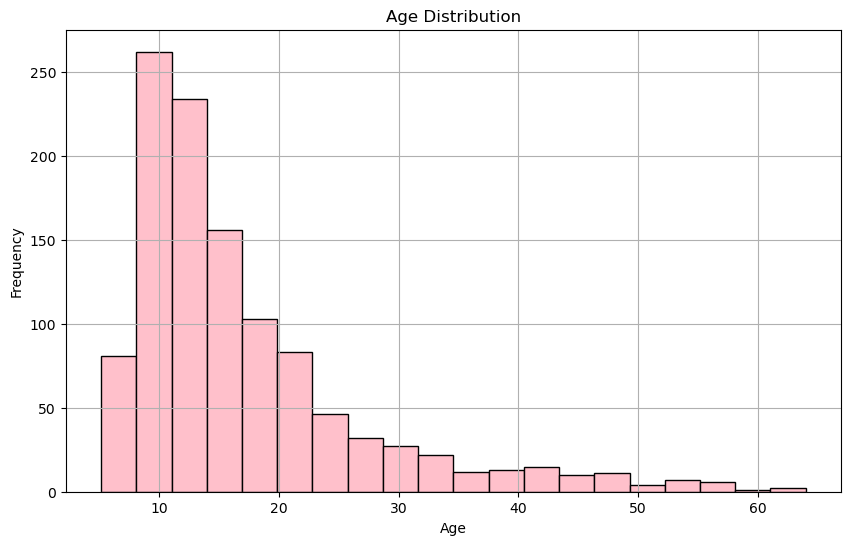

In [164]:
import matplotlib.pyplot as plt

# Display basic statistics for participants_age
age_stats = data_train_participants['participants_age'].describe()
print(age_stats)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_train_participants['participants_age'], bins=20, edgecolor='black', color = 'pink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


count     1127
unique       2
top          M
freq       900
Name: participants_sex, dtype: object


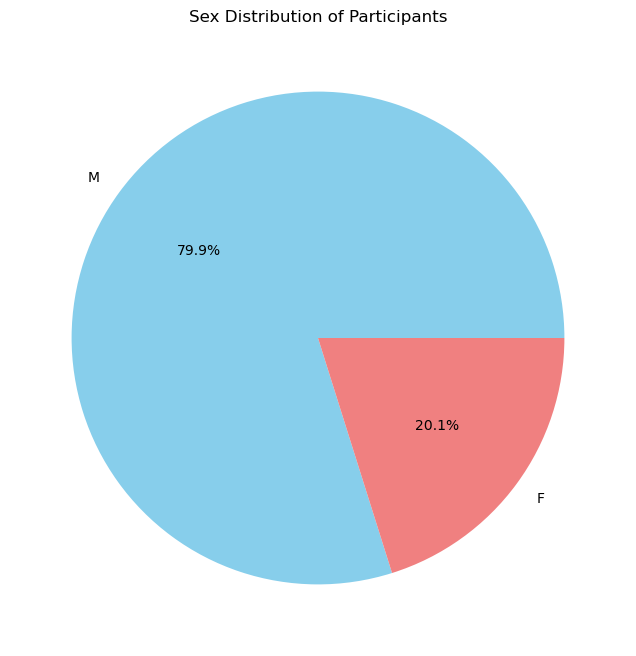

In [165]:
# Display basic statistics for participants_sex
sex_stats = data_train_participants['participants_sex'].describe()
print(sex_stats)

# Count the number of each category
sex_counts = data_train_participants['participants_sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral' ])
plt.title('Sex Distribution of Participants')
plt.ylabel('')  # Hides the y-label
plt.show()

count    1127.000000
mean       16.448980
std        10.635024
min         0.000000
25%         7.000000
50%        17.000000
75%        26.000000
max        34.000000
Name: participants_site, dtype: float64


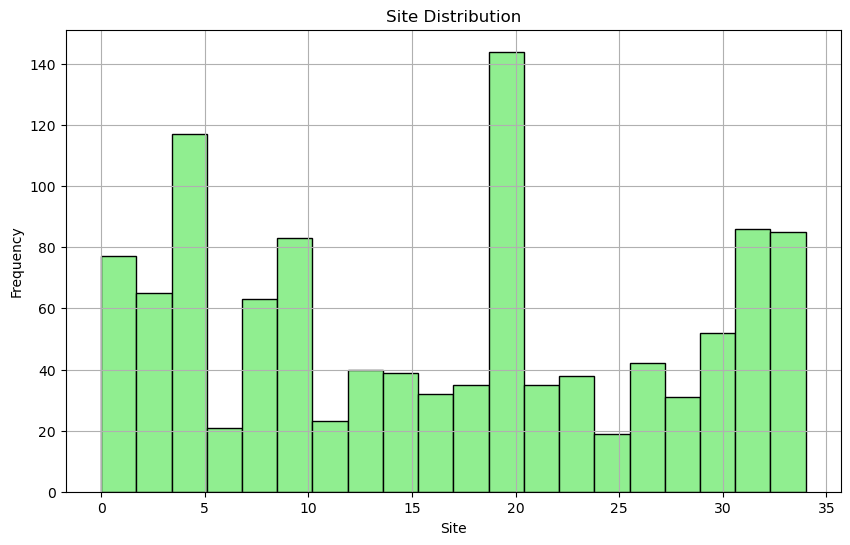

In [166]:
# Display basic statistics for participants_site
site_stats = data_train_participants['participants_site'].describe()
print(site_stats)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_train_participants['participants_site'], bins=20, edgecolor='black', color = 'lightgreen')
plt.title('Site Distribution')
plt.xlabel('Site')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

count    1127.000000
mean        0.476486
std         0.499669
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: participants_asd, dtype: float64


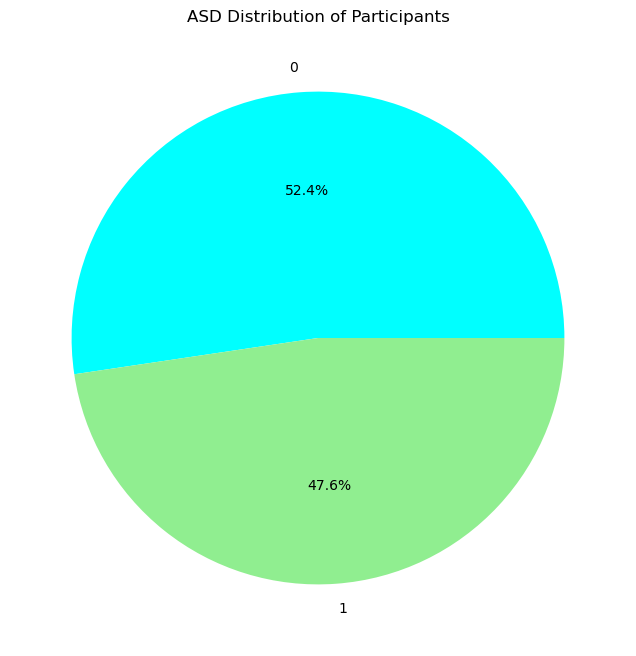

In [167]:
# Display basic statistics for participants_asd
asd_stats = data_train_participants['participants_asd'].describe()
print(asd_stats)

# Count the number of each category
asd_counts = data_train_participants['participants_asd'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
asd_counts.plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'lightgreen' ])
plt.title('ASD Distribution of Participants')
plt.ylabel('')  # Hides the y-label
plt.show()

#### Testing data

The testing data can be loaded similarly as follows:

In [168]:
from problem import get_test_data

data_test = get_test_data()

In [169]:
data_test.head()

,participants_site,participants_sex,participants_age,participants_asd,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,...,fmri_basc064,fmri_basc122,fmri_basc197,fmri_craddock_scorr_mean,fmri_harvard_oxford_cort_prob_2mm,fmri_motions,fmri_msdl,fmri_power_2011,fmri_select,repetition_time
subject_id,,,,,,,,,,,,,,,,,,,,,
5181409268393785348,31,M,12.200000,0,985.0,723.0,2851.0,1844.0,495.0,3526.0,...,./data/fmri/basc064/5181409268393785348/run_1/...,./data/fmri/basc122/5181409268393785348/run_1/...,./data/fmri/basc197/5181409268393785348/run_1/...,./data/fmri/craddock_scorr_mean/51814092683937...,./data/fmri/harvard_oxford_cort_prob_2mm/51814...,./data/fmri/motions/5181409268393785348/run_1/...,./data/fmri/msdl/5181409268393785348/run_1/518...,./data/fmri/power_2011/5181409268393785348/run...,1,2.0
8797865049371315550,9,M,14.000000,1,1174.0,506.0,1890.0,1327.0,462.0,3564.0,...,./data/fmri/basc064/8797865049371315550/run_1/...,./data/fmri/basc122/8797865049371315550/run_1/...,./data/fmri/basc197/8797865049371315550/run_1/...,./data/fmri/craddock_scorr_mean/87978650493713...,./data/fmri/harvard_oxford_cort_prob_2mm/87978...,./data/fmri/motions/8797865049371315550/run_1/...,./data/fmri/msdl/8797865049371315550/run_1/879...,./data/fmri/power_2011/8797865049371315550/run...,1,2.5
6486385878325245147,20,M,14.425000,0,1288.0,568.0,2406.0,1546.0,432.0,3497.0,...,./data/fmri/basc064/6486385878325245147/run_1/...,./data/fmri/basc122/6486385878325245147/run_1/...,./data/fmri/basc197/6486385878325245147/run_1/...,./data/fmri/craddock_scorr_mean/64863858783252...,./data/fmri/harvard_oxford_cort_prob_2mm/64863...,./data/fmri/motions/6486385878325245147/run_1/...,./data/fmri/msdl/6486385878325245147/run_1/648...,./data/fmri/power_2011/6486385878325245147/run...,1,2.0
17126438435398394588,33,M,22.880200,1,1179.0,991.0,2427.0,1771.0,363.0,3579.0,...,./data/fmri/basc064/17126438435398394588/run_1...,./data/fmri/basc122/17126438435398394588/run_1...,./data/fmri/basc197/17126438435398394588/run_1...,./data/fmri/craddock_scorr_mean/17126438435398...,./data/fmri/harvard_oxford_cort_prob_2mm/17126...,./data/fmri/motions/17126438435398394588/run_1...,./data/fmri/msdl/17126438435398394588/run_1/17...,./data/fmri/power_2011/17126438435398394588/ru...,1,2.0
16638049522113999228,2,M,8.252055,1,1064.0,721.0,2445.0,1453.0,561.0,3262.0,...,./data/fmri/basc064/16638049522113999228/run_1...,./data/fmri/basc122/16638049522113999228/run_1...,./data/fmri/basc197/16638049522113999228/run_1...,./data/fmri/craddock_scorr_mean/16638049522113...,./data/fmri/harvard_oxford_cort_prob_2mm/16638...,./data/fmri/motions/16638049522113999228/run_1...,./data/fmri/msdl/16638049522113999228/run_1/16...,./data/fmri/power_2011/16638049522113999228/ru...,0,2.0


In [170]:
print(data_test['participants_asd'])

subject_id
5181409268393785348     0
8797865049371315550     1
6486385878325245147     0
17126438435398394588    1
16638049522113999228    1
11338998855918763       0
7808973240493555703     1
16293485569559664059    1
14383505943327373487    1
15533938102961737789    1
17598599470795790973    1
6204830900434343911     0
16896648939360734983    0
15156789682402724878    1
17843303996820128544    0
2263593867905829219     0
11723007971726512929    0
18437859856385194816    1
7223236323395509661     0
3369213453014636420     1
1711749423820760510     1
13099691578576846101    0
10631804530197433027    0
Name: participants_asd, dtype: int64


In [171]:
data_test_participants = data_test[[col for col in data_test.columns if col.startswith('participants')]]
data_test_participants.head()

,participants_site,participants_sex,participants_age,participants_asd
subject_id,,,,
5181409268393785348,31,M,12.200000,0
8797865049371315550,9,M,14.000000,1
6486385878325245147,20,M,14.425000,0
17126438435398394588,33,M,22.880200,1
16638049522113999228,2,M,8.252055,1


count    23.000000
mean     16.516073
std       6.318677
min       8.252055
25%      12.280822
50%      14.300000
75%      18.317600
max      34.760000
Name: participants_age, dtype: float64


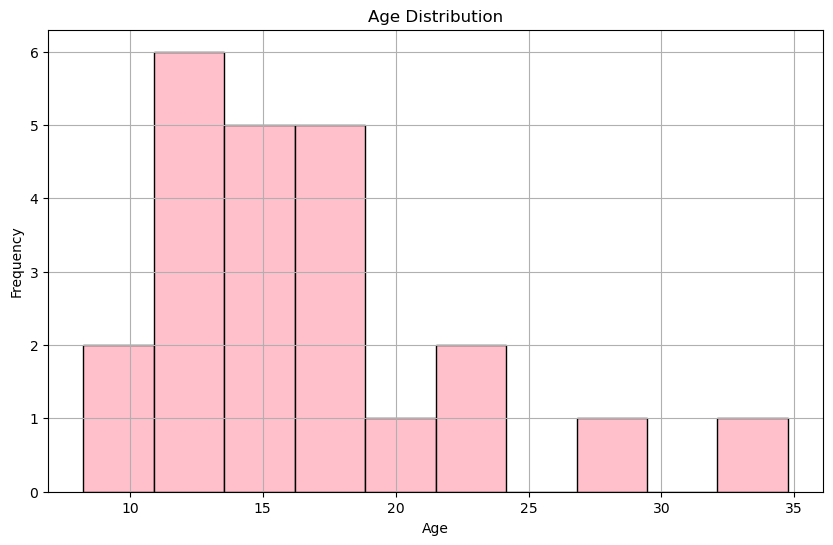

In [172]:
# Display basic statistics for participants_age
age_stats = data_test_participants['participants_age'].describe()
print(age_stats)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_test_participants['participants_age'], bins=10, edgecolor='black', color = 'pink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

count     23
unique     2
top        M
freq      20
Name: participants_sex, dtype: object


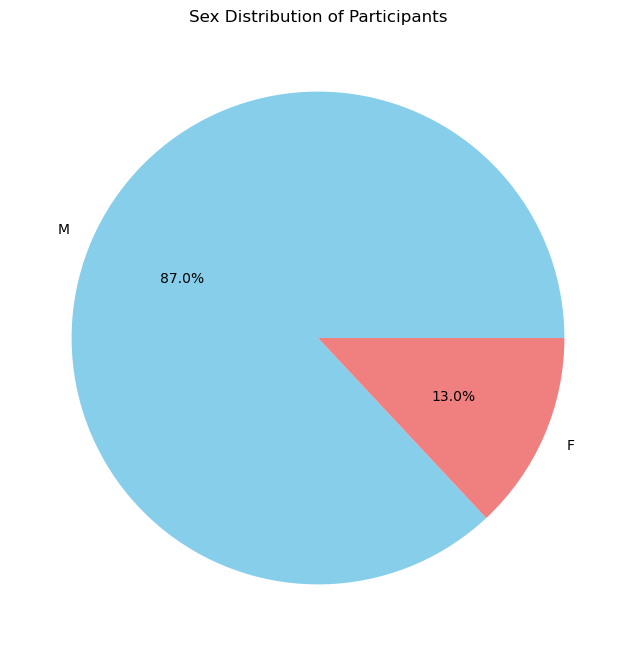

In [173]:
# Display basic statistics for participants_sex
sex_stats = data_test_participants['participants_sex'].describe()
print(sex_stats)

# Count the number of each category
sex_counts = data_test_participants['participants_sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral' ])
plt.title('Sex Distribution of Participants')
plt.ylabel('')  # Hides the y-label
plt.show()

count    23.000000
mean     17.565217
std      11.680699
min       2.000000
25%       7.500000
50%      17.000000
75%      30.000000
max      34.000000
Name: participants_site, dtype: float64


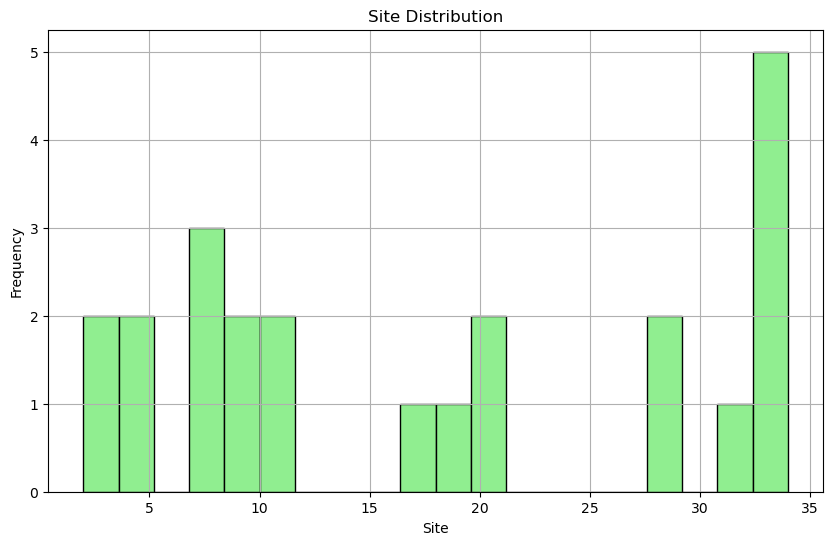

In [174]:
# Display basic statistics for participants_site
site_stats = data_test_participants['participants_site'].describe()
print(site_stats)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_test_participants['participants_site'], bins=20, edgecolor='black', color = 'lightgreen')
plt.title('Site Distribution')
plt.xlabel('Site')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

count    23.000000
mean      0.521739
std       0.510754
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: participants_asd, dtype: float64


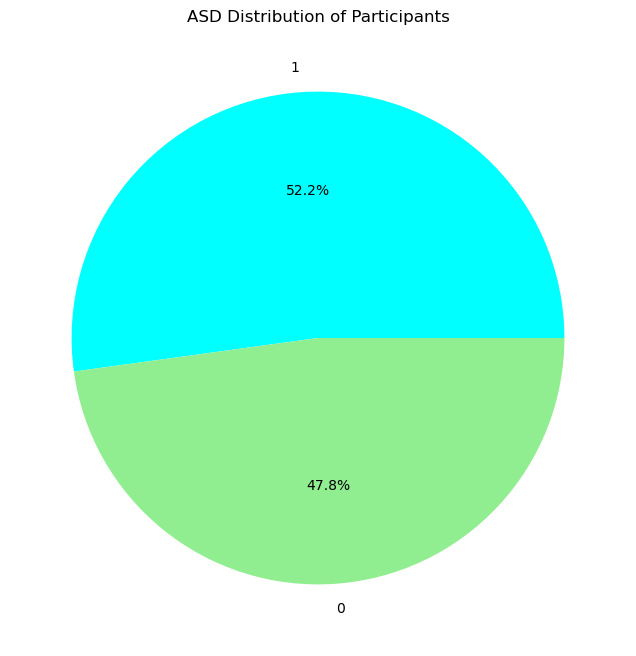

In [175]:
# Display basic statistics for participants_asd
asd_stats = data_test_participants['participants_asd'].describe()
print(asd_stats)

# Count the number of each category
asd_counts = data_test_participants['participants_asd'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
asd_counts.plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'lightgreen' ])
plt.title('ASD Distribution of Participants')
plt.ylabel('')  # Hides the y-label
plt.show()

#### Structural MRI features

A set of structural features have been extracted for each subject: (i) normalized brain volume computed using subcortical segmentation of FreeSurfer and (ii) cortical thickness and area for right and left hemisphere of FreeSurfer.

In [176]:
data_train_anatomy = data_train[[col for col in data_train.columns if col.startswith('anatomy')]]
data_train_anatomy

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,4406.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,5611.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,6395.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,5405.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,5644.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14661172306020020468,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,5064.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
1061335839335536120,1373.0,683.0,1691.0,1315.0,364.0,3137.0,5596.0,3400.0,903.0,6023.0,...,2303120.0,1.059092,1.502325,277.0,313.0,590.0,1.533037e+06,1.533037e+06,1599229.0,3
7789126193351344754,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,4846.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


Note that the column `anatomy_select` contain a label affected during a manual quality check (i.e. `0` and `3` reject, `1` accept, `2` accept with reserve). This column can be used during training to exclude noisy data for instance.

In [177]:
data_train_anatomy['anatomy_select'].head()

subject_id
1932355398536124106     1
5174041730092253771     1
10219322676643534800    1
10645466564919190227    1
14512541342641936232    1
Name: anatomy_select, dtype: int64

count    23.000000
mean     17.565217
std      11.680699
min       2.000000
25%       7.500000
50%      17.000000
75%      30.000000
max      34.000000
Name: participants_site, dtype: float64


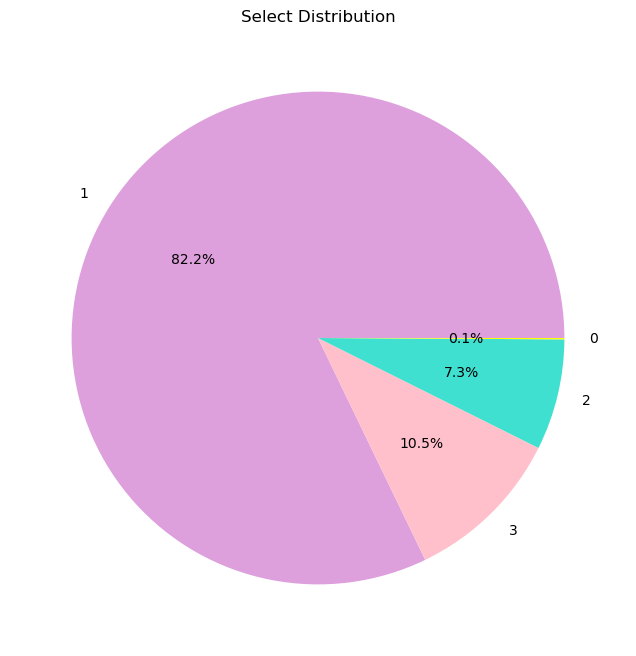

In [178]:
# Display basic statistics for participants_site
select_stats = data_train_anatomy['anatomy_select'].describe()
print(site_stats)

# Count the number of each category
select_counts = data_train_anatomy['anatomy_select'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
select_counts.plot(kind='pie', autopct='%1.1f%%', colors=['plum', 'pink', 'turquoise', 'yellow'])
plt.title('Select Distribution')
plt.ylabel('')  # Hides the y-label
plt.show()

In [179]:
data_train_anatomy_cta = data_train_anatomy[[col for col in data_train_anatomy.columns if col.startswith('anatomy_lh_') or col.startswith('anatomy_rh_') or col.startswith('anatomy_select')]]
data_train_anatomy_cta.head()

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_rh_superiorfrontal_thickness,anatomy_rh_superiorparietal_thickness,anatomy_rh_superiortemporal_thickness,anatomy_rh_supramarginal_thickness,anatomy_rh_frontalpole_thickness,anatomy_rh_temporalpole_thickness,anatomy_rh_transversetemporal_thickness,anatomy_rh_insula_thickness,anatomy_rh_MeanThickness_thickness,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,4406.0,...,3.022,2.500,3.247,2.784,2.787,4.015,2.726,3.191,2.74804,1
5174041730092253771,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,5611.0,...,2.775,2.391,3.064,2.805,3.054,3.958,2.524,3.265,2.64882,1
10219322676643534800,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,6395.0,...,2.497,1.997,2.598,2.366,2.747,3.311,2.190,2.767,2.31464,1
10645466564919190227,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,5405.0,...,2.844,2.449,3.238,2.953,3.226,3.295,2.981,3.243,2.79214,1
14512541342641936232,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,5644.0,...,3.101,2.339,3.234,2.814,2.210,4.078,2.595,3.311,2.75440,1


In [180]:
data_train_anatomy_nbv = data_train_anatomy[[col for col in data_train_anatomy.columns if not ((col.startswith('anatomy_lh_')) or (col.startswith('anatomy_rh_')))]]
data_train_anatomy_nbv.head()

,anatomy_Left-Lateral-Ventricle,anatomy_Left-Inf-Lat-Vent,anatomy_Left-Cerebellum-White-Matter,anatomy_Left-Cerebellum-Cortex,anatomy_Left-Thalamus-Proper,anatomy_Left-Caudate,anatomy_Left-Putamen,anatomy_Left-Pallidum,anatomy_3rd-Ventricle,anatomy_4th-Ventricle,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,5683.9,397.2,11115.2,47761.2,6921.0,3193.7,5297.5,1697.6,704.9,1643.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,6865.4,347.0,16112.7,57013.4,9200.0,4160.0,6264.1,2522.0,1045.9,2122.7,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,5059.3,457.4,13031.3,48960.2,6903.1,3063.0,4927.9,1827.8,929.1,2398.6,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,3693.3,420.7,13679.9,53568.2,7398.0,4548.2,5641.6,1802.0,613.0,1962.5,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,3922.9,240.6,13537.0,63393.6,8112.1,3350.0,6317.5,2088.1,549.3,1477.1,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1


## Workflow

<img src="./img/workflow2.png" width="100%">

In [181]:
import pandas as pd
train_data = data_train[[col for col in data_train.columns if col.startswith('anatomy') or col.startswith('participants_asd')]]
train_data #set sa anatomijom i asdom

df = pd.DataFrame(train_data)

# Filter the DataFrame where quality_selector is 1
filtered_df = df[df['anatomy_select'].isin([1, 2])]


filtered_df #odabrani samo kvalitetni uzorci

,participants_asd,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,0,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,0,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,1,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,1,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,1,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,0,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,4179.0,1246.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,0,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,0,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [182]:
#drugi dio
y = filtered_df.participants_asd #target variable
y
# Select all columns that start with 'anatomy' as features
features = filtered_df[[col for col in filtered_df.columns if col.startswith('anatomy')]]
features

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,4406.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,5611.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,6395.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,5405.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,5644.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,4179.0,1246.0,6084.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,5064.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,4846.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [183]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)
scaled_features_df

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,-0.552148,-1.580710,-1.440316,-0.590172,-0.116118,-1.322757,-1.073410,-0.619476,-1.232087,-1.441769,...,-1.211371,0.368197,-0.133116,-0.679366,-0.668177,-0.682701,-1.594504,-1.594504,-1.206807,-0.297578
5174041730092253771,0.881002,0.426686,-0.166161,0.048096,-0.078398,0.484040,0.590798,-0.179376,0.163380,0.182100,...,0.412412,-0.547561,-0.437300,-0.372986,-0.199392,-0.289891,1.138204,1.138204,0.596753,-0.297578
10219322676643534800,-0.794170,-1.454834,-1.409356,2.112616,0.892908,-0.681484,-0.114134,-1.857038,0.249920,1.238625,...,-0.660152,-0.509643,-0.101208,-0.311710,-0.280920,-0.300228,-0.842382,-0.842382,-1.116108,-0.297578
10645466564919190227,-0.523675,-0.514074,-0.023265,-1.129941,0.468551,0.961484,0.217675,-0.394145,-0.523536,-0.095508,...,-0.574320,0.433977,-0.092052,-0.168732,-0.138246,-0.155508,-0.730470,-0.730470,-0.300295,-0.297578
14512541342641936232,1.872819,-0.480948,-0.428137,0.907000,2.364012,0.853825,0.657935,0.526545,-0.496492,0.226571,...,0.153625,-0.251289,-0.090655,-0.842769,-0.443976,-0.651690,0.301466,0.301466,0.154761,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,-1.368380,1.566198,1.927263,0.993678,2.458314,1.527863,-0.341365,0.919115,0.655579,0.819519,...,0.608312,-0.763860,-0.349880,-0.699791,-0.729323,-0.724050,1.303717,1.303717,0.593425,-0.297578
14661172306020020468,-1.330416,-0.805577,0.024366,-0.952645,1.336126,-0.021489,-1.535619,-1.527843,-1.096868,-0.555042,...,-0.188580,-0.593975,-0.257572,0.627857,0.432450,0.537079,0.016529,0.016529,-0.374535,-0.297578
7789126193351344754,0.064771,-0.977829,0.381606,1.013377,0.864618,-0.789143,-0.310379,1.065228,1.418218,-0.848821,...,-0.294521,0.044944,-0.333482,-0.230008,-0.117864,-0.176182,-0.044492,-0.044492,0.050951,-0.297578


In [184]:
#POKUSAJ 2
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test2 = train_test_split(features, y, test_size=0.25, random_state=16)

In [185]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
scaled_features = scaler.fit_transform(X_train)

# Convert the scaled features back to a DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, columns=X_train.columns, index=X_train.index)
scaled_features_df

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
11914947177169130679,-0.523846,-0.549852,0.828132,-0.463063,-0.475334,-0.014155,-0.096048,0.513056,1.432843,1.192421,...,0.363473,-0.378534,-0.391803,-0.458025,-0.510065,-0.491153,0.949942,0.949942,0.572623,-0.285561
8818770057582598150,0.995307,1.324283,1.103542,-0.901390,-0.771941,0.434915,2.879076,1.635977,0.177931,0.046382,...,0.542601,-0.663137,-0.567441,-0.581935,-0.713531,-0.657478,1.443620,1.443620,0.940160,-0.285561
4968036937982205901,-0.695286,1.356707,1.925067,-0.987491,0.758930,0.279651,-0.871942,0.498819,0.172475,0.049047,...,0.184856,-0.089342,0.058411,0.739773,0.975238,0.870638,0.160629,0.160629,0.150422,-0.285561
12305871541711473974,-0.638139,-0.186698,-0.859642,-1.374941,-1.125955,-1.053227,-1.471378,-2.277340,-0.962403,-0.501318,...,-1.114657,-0.024263,0.073382,0.904987,0.832812,0.881033,-1.600150,-1.600150,-1.533404,-0.285561
2982121349972811953,-0.361930,-0.485003,-0.706636,-1.543228,-0.704965,-0.410674,-0.858967,-0.088445,-0.765981,-0.305425,...,-0.339419,-0.745908,-0.693893,1.173459,0.873505,1.036963,0.313544,0.313544,-0.183181,-0.285561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584113492361980248,0.271447,-0.815733,-1.210379,-0.474803,2.261097,1.521760,0.958804,-0.396314,-0.645946,0.619402,...,0.254620,-0.860144,-0.551177,-0.602587,-0.835611,-0.730246,1.001941,1.001941,0.314609,-0.285561
7108231313682110967,-0.066671,-0.031061,0.251417,0.769735,-1.738303,-0.176585,-0.243961,-0.319792,0.990896,0.049047,...,-0.033822,-0.245516,0.178374,-0.581935,-0.774571,-0.688664,-0.261578,-0.261578,-0.340753,-0.285561
6376551443264196245,1.514390,-0.167243,0.425608,-1.159691,0.012631,-0.243467,-0.389279,-0.236151,0.112457,-0.679887,...,-0.193452,0.476362,-0.002402,-0.891711,-0.794917,-0.854990,-0.283219,-0.283219,0.132143,-0.285561


In [186]:
#skaliranje testa

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
scaled_features_test = scaler.fit_transform(X_test)

# Convert the scaled features back to a DataFrame for easier handling
scaled_features_df_test = pd.DataFrame(scaled_features_test, columns=X_test.columns, index=X_test.index)
scaled_features_df_test

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
3513534968964187215,0.131478,0.405623,-0.303485,-0.600150,1.066167,-0.284014,-0.419956,-0.536802,0.195308,-0.579451,...,-0.622368,0.012656,-0.274875,0.484669,0.370428,0.432843,-0.631974,-0.631974,-0.422418,-0.331862
16392617381180084180,-0.697547,-0.747441,0.836168,0.228418,1.002805,0.515097,-0.043253,0.002603,-0.617771,0.547596,...,0.170649,0.366997,0.206566,0.623191,0.493388,0.565033,-0.056501,-0.056501,0.356977,-0.331862
805048801547934547,1.398838,0.405623,0.281207,1.213851,1.011857,0.166596,1.866061,1.206418,1.399088,1.245890,...,0.095632,0.373738,-0.103174,-0.544350,-0.674739,-0.614503,0.268254,0.268254,0.610413,-0.331862
7643199759602744603,0.993854,-1.032148,-0.400107,0.063509,1.600220,0.195453,-0.376093,-0.089867,-0.670568,-0.790336,...,-0.501543,-0.435080,-0.594668,0.583614,0.841777,0.717559,0.037655,0.037655,-0.308774,-0.331862
3792180006359000357,2.794839,0.377152,-0.791553,-0.185866,-1.232978,0.774808,1.568053,0.101922,0.807758,-0.952341,...,0.109483,-0.060940,-0.547073,-0.465195,-0.469805,-0.472145,0.995940,0.995940,0.616453,-0.331862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005987433942226638,-1.879146,-1.345326,-0.903041,-0.933991,-0.680821,-1.280682,-2.355072,-2.009464,-1.626200,-1.281936,...,-1.701607,-0.228524,-0.346201,0.148259,-0.039442,0.056612,-2.297440,-2.297440,-1.995390,-0.331862
7179331416123524154,2.189746,0.889625,1.943612,0.662813,2.034704,0.943509,1.307458,1.713287,0.126672,1.079696,...,0.544306,0.083659,-0.308943,-0.366251,-0.018948,-0.197598,1.311922,1.311922,1.112765,-0.331862
2848232240603600516,0.117184,-0.768794,-1.606652,-2.088355,-0.128664,-0.865589,-1.239155,-0.560776,-1.436130,-1.522149,...,-0.984526,-0.396658,-0.099561,-0.623505,-0.797700,-0.716187,-1.437158,-1.437158,-1.491620,-0.331862


In [187]:
#model development and prediction
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500)

#fit the model with data
logreg.fit(scaled_features_df, y_train)
y_pred = logreg.predict(scaled_features_df_test)

In [188]:
#model evaluation using confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred)
cnf_matrix

array([[87, 47],
       [53, 65]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

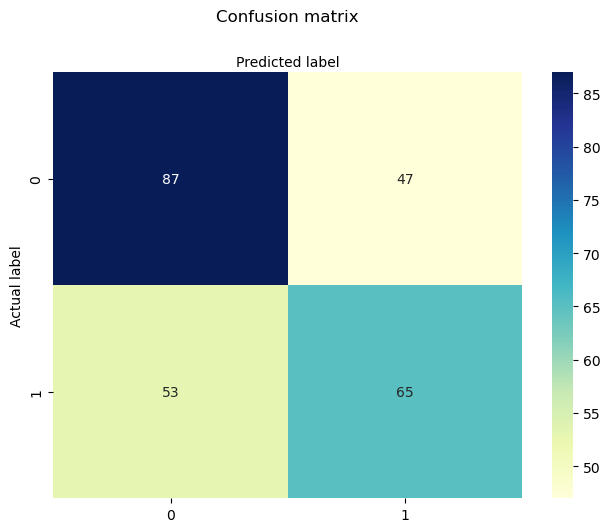

In [189]:
import numpy as np
import seaborn as sns

class_names=[0,1]
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
from sklearn.metrics import classification_report
target_names = ['without asd', 'with asd']
print(classification_report(y_test2, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 without asd       0.62      0.65      0.64       134
    with asd       0.58      0.55      0.57       118

    accuracy                           0.60       252
   macro avg       0.60      0.60      0.60       252
weighted avg       0.60      0.60      0.60       252



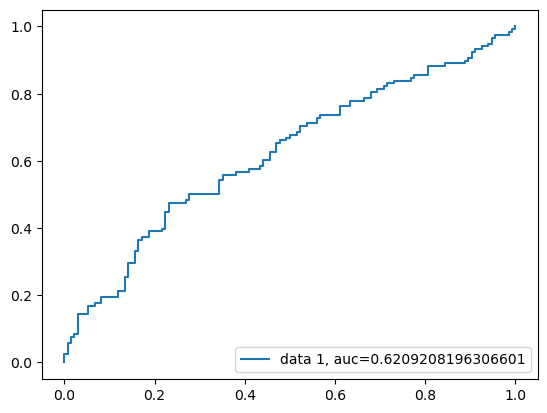

In [191]:
y_pred_proba = logreg.predict_proba(scaled_features_df_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred_proba)
auc = metrics.roc_auc_score(y_test2, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [197]:
#DIO SA RAZDVOJENIM TABLICAMA

#CORTICAL THICKNESS AREA
data_train_anatomy_cta2 = filtered_df[[col for col in filtered_df.columns if col.startswith('anatomy_lh_') or col.startswith('anatomy_rh_') or col.startswith('anatomy_select') or col.startswith('participants_asd')]]
data_train_anatomy_cta2

,participants_asd,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_rh_superiorfrontal_thickness,anatomy_rh_superiorparietal_thickness,anatomy_rh_superiortemporal_thickness,anatomy_rh_supramarginal_thickness,anatomy_rh_frontalpole_thickness,anatomy_rh_temporalpole_thickness,anatomy_rh_transversetemporal_thickness,anatomy_rh_insula_thickness,anatomy_rh_MeanThickness_thickness,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,0,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,...,3.022,2.500,3.247,2.784,2.787,4.015,2.726,3.191,2.74804,1
5174041730092253771,0,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,...,2.775,2.391,3.064,2.805,3.054,3.958,2.524,3.265,2.64882,1
10219322676643534800,1,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,...,2.497,1.997,2.598,2.366,2.747,3.311,2.190,2.767,2.31464,1
10645466564919190227,1,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,...,2.844,2.449,3.238,2.953,3.226,3.295,2.981,3.243,2.79214,1
14512541342641936232,1,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,...,3.101,2.339,3.234,2.814,2.210,4.078,2.595,3.311,2.75440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,0,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,4179.0,1246.0,...,2.838,2.190,2.941,2.626,2.397,3.465,2.331,3.030,2.53602,1
14661172306020020468,0,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,...,2.865,2.398,2.859,2.705,3.069,3.368,2.361,2.933,2.54866,1
7789126193351344754,0,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,...,3.004,2.521,3.162,2.859,2.991,3.377,2.980,3.295,2.79001,1


In [201]:
y_cta = data_train_anatomy_cta2.participants_asd #target variable
y_cta
# Select all columns that start with 'anatomy' as features
X_cta = data_train_anatomy_cta2[[col for col in data_train_anatomy_cta2.columns if col.startswith('anatomy')]]
X_cta

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_rh_superiorfrontal_thickness,anatomy_rh_superiorparietal_thickness,anatomy_rh_superiortemporal_thickness,anatomy_rh_supramarginal_thickness,anatomy_rh_frontalpole_thickness,anatomy_rh_temporalpole_thickness,anatomy_rh_transversetemporal_thickness,anatomy_rh_insula_thickness,anatomy_rh_MeanThickness_thickness,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,4406.0,...,3.022,2.500,3.247,2.784,2.787,4.015,2.726,3.191,2.74804,1
5174041730092253771,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,5611.0,...,2.775,2.391,3.064,2.805,3.054,3.958,2.524,3.265,2.64882,1
10219322676643534800,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,6395.0,...,2.497,1.997,2.598,2.366,2.747,3.311,2.190,2.767,2.31464,1
10645466564919190227,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,5405.0,...,2.844,2.449,3.238,2.953,3.226,3.295,2.981,3.243,2.79214,1
14512541342641936232,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,5644.0,...,3.101,2.339,3.234,2.814,2.210,4.078,2.595,3.311,2.75440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,4179.0,1246.0,6084.0,...,2.838,2.190,2.941,2.626,2.397,3.465,2.331,3.030,2.53602,1
14661172306020020468,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,5064.0,...,2.865,2.398,2.859,2.705,3.069,3.368,2.361,2.933,2.54866,1
7789126193351344754,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,4846.0,...,3.004,2.521,3.162,2.859,2.991,3.377,2.980,3.295,2.79001,1


In [200]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
skaliran_cta = scaler.fit_transform(X_cta)

# Convert the scaled features back to a DataFrame for easier handling
skaliran_cta_df = pd.DataFrame(skaliran_cta, columns=X_cta.columns, index=X_cta.index)
skaliran_cta_df

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_rh_superiorfrontal_thickness,anatomy_rh_superiorparietal_thickness,anatomy_rh_superiortemporal_thickness,anatomy_rh_supramarginal_thickness,anatomy_rh_frontalpole_thickness,anatomy_rh_temporalpole_thickness,anatomy_rh_transversetemporal_thickness,anatomy_rh_insula_thickness,anatomy_rh_MeanThickness_thickness,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,-0.552148,-1.580710,-1.440316,-0.590172,-0.116118,-1.322757,-1.073410,-0.619476,-1.232087,-1.441769,...,0.592365,0.803995,1.175515,0.330418,-0.329037,0.999928,0.407439,0.398812,0.724920,-0.297578
5174041730092253771,0.881002,0.426686,-0.166161,0.048096,-0.078398,0.484040,0.590798,-0.179376,0.163380,0.182100,...,-0.621951,0.209196,0.323514,0.441015,0.447291,0.856051,-0.254450,0.757829,0.034475,-0.297578
10219322676643534800,-0.794170,-1.454834,-1.409356,2.112616,0.892908,-0.681484,-0.114134,-1.857038,0.249920,1.238625,...,-1.988671,-1.940809,-1.846062,-1.870996,-0.445341,-0.777085,-1.348860,-1.658260,-2.290993,-0.297578
10645466564919190227,-0.523675,-0.514074,-0.023265,-1.129941,0.468551,0.961484,0.217675,-0.394145,-0.523536,-0.095508,...,-0.282729,0.525694,1.133613,1.220463,0.947398,-0.817472,1.242992,0.651094,1.031800,-0.297578
14512541342641936232,1.872819,-0.480948,-0.428137,0.907000,2.364012,0.853825,0.657935,0.526545,-0.496492,0.226571,...,0.980750,-0.074561,1.114991,0.488414,-2.006721,1.158951,-0.021806,0.981002,0.769178,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,-1.368380,1.566198,1.927263,0.993678,2.458314,1.527863,-0.341365,0.919115,0.655579,0.819519,...,-0.312226,-0.887634,-0.249142,-0.501695,-1.463000,-0.388364,-0.886848,-0.382293,-0.750470,-0.297578
14661172306020020468,-1.330416,-0.805577,0.024366,-0.952645,1.336126,-0.021489,-1.535619,-1.527843,-1.096868,-0.555042,...,-0.179487,0.247394,-0.630913,-0.085639,0.490905,-0.633208,-0.788548,-0.852897,-0.662511,-0.297578
7789126193351344754,0.064771,-0.977829,0.381606,1.013377,0.864618,-0.789143,-0.310379,1.065228,1.418218,-0.848821,...,0.503873,0.918589,0.779777,0.725408,0.264112,-0.610490,1.239715,0.903377,1.016978,-0.297578


In [206]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train_cta, X_test_cta, y_train_cta, y_test_cta = train_test_split(skaliran_cta_df, y_cta, test_size=0.25, random_state=16)
X_test_cta

,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,anatomy_lh_lateraloccipital_area,...,anatomy_rh_superiorfrontal_thickness,anatomy_rh_superiorparietal_thickness,anatomy_rh_superiortemporal_thickness,anatomy_rh_supramarginal_thickness,anatomy_rh_frontalpole_thickness,anatomy_rh_temporalpole_thickness,anatomy_rh_transversetemporal_thickness,anatomy_rh_insula_thickness,anatomy_rh_MeanThickness_thickness,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
3513534968964187215,0.278320,0.333935,-0.230465,-0.594112,1.128662,-0.220424,-0.275520,-0.476884,0.157971,-0.532133,...,1.197065,0.793081,-1.464291,0.488414,-1.483353,-2.041693,-1.450437,0.680204,0.254788,-0.297578
16392617381180084180,-0.547403,-0.739326,0.865071,0.217513,1.062651,0.622124,0.101477,0.077643,-0.674982,0.555387,...,0.833262,-0.461998,-0.463307,0.630611,-0.637243,-1.622681,-0.228236,-0.032979,0.290347,-0.297578
805048801547934547,1.540631,0.333935,0.331593,1.182794,1.072081,0.254680,2.012283,1.315205,1.391174,1.229192,...,-0.592453,-0.080018,0.933417,0.530546,-1.061752,0.674311,0.433653,0.588024,0.085970,-0.297578
7643199759602744603,1.137261,-1.004329,-0.323347,0.055976,1.685041,0.285105,-0.231623,-0.017419,-0.729070,-0.735622,...,-0.346640,0.907675,-2.367506,0.109223,-1.777021,-1.945774,-1.168642,-1.396275,-0.787699,-0.297578
3792180006359000357,2.931072,0.307435,-0.699639,-0.188299,-1.266597,0.895952,1.714042,0.179746,0.785390,-0.891945,...,0.789016,0.547522,0.924105,0.393616,0.868893,0.464805,0.040451,0.219303,0.699869,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005987433942226638,-1.724295,-1.295832,-0.806811,-0.921125,-0.691358,-1.271268,-2.212148,-1.990829,-1.708061,-1.209980,...,0.798848,0.203739,-1.450324,0.225087,-1.218762,-2.498567,-1.201409,-1.798956,-0.183194,-0.297578
7179331416123524154,2.328390,0.784440,1.929645,0.643025,2.137689,1.073824,1.453243,1.836284,0.087657,1.068826,...,0.022079,0.591177,0.304891,0.435749,-0.500586,-0.133423,0.138752,1.344871,0.663683,-0.297578
2848232240603600516,0.264083,-0.759201,-1.483185,-2.051884,-0.116118,-0.833611,-1.095359,-0.501529,-1.513344,-1.441769,...,-0.066413,-0.642075,-0.477274,-0.970417,-0.785530,1.141281,-1.266943,-0.814084,-0.580259,-0.297578


In [209]:
#model development and prediction
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500)

#fit the model with data
logreg.fit(X_train_cta, y_train_cta)
y_pred_cta = logreg.predict(X_test_cta)

In [210]:
#model evaluation using confusion matrix
from sklearn import metrics
cnf_matrix_cta = metrics.confusion_matrix(y_test_cta, y_pred_cta)
cnf_matrix_cta

array([[82, 52],
       [64, 54]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

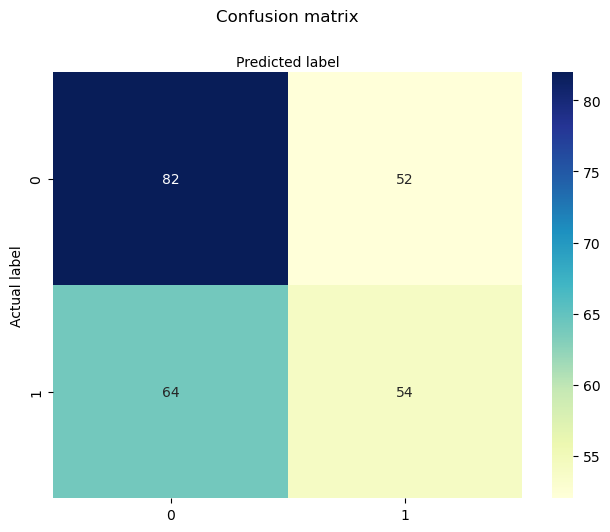

In [211]:
class_names=[0,1]
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_cta), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [212]:
target_names = ['without asd', 'with asd']
print(classification_report(y_test_cta, y_pred_cta, target_names=target_names))

              precision    recall  f1-score   support

 without asd       0.56      0.61      0.59       134
    with asd       0.51      0.46      0.48       118

    accuracy                           0.54       252
   macro avg       0.54      0.53      0.53       252
weighted avg       0.54      0.54      0.54       252



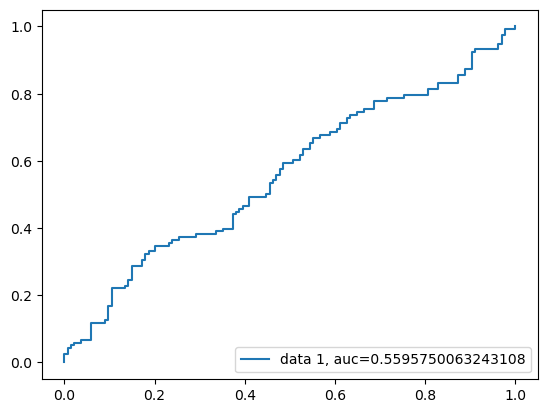

In [213]:
y_pred_proba_cta = logreg.predict_proba(X_test_cta)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_cta, y_pred_proba_cta)
auc = metrics.roc_auc_score(y_test_cta, y_pred_proba_cta)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [198]:
#NORMALIZED BRAIN VOLUME
data_train_anatomy_nbv2 = filtered_df[[col for col in filtered_df.columns if not ((col.startswith('anatomy_lh_')) or (col.startswith('anatomy_rh_')))]]
data_train_anatomy_nbv2

,participants_asd,anatomy_Left-Lateral-Ventricle,anatomy_Left-Inf-Lat-Vent,anatomy_Left-Cerebellum-White-Matter,anatomy_Left-Cerebellum-Cortex,anatomy_Left-Thalamus-Proper,anatomy_Left-Caudate,anatomy_Left-Putamen,anatomy_Left-Pallidum,anatomy_3rd-Ventricle,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,0,5683.9,397.2,11115.2,47761.2,6921.0,3193.7,5297.5,1697.6,704.9,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,0,6865.4,347.0,16112.7,57013.4,9200.0,4160.0,6264.1,2522.0,1045.9,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,1,5059.3,457.4,13031.3,48960.2,6903.1,3063.0,4927.9,1827.8,929.1,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,1,3693.3,420.7,13679.9,53568.2,7398.0,4548.2,5641.6,1802.0,613.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,1,3922.9,240.6,13537.0,63393.6,8112.1,3350.0,6317.5,2088.1,549.3,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,0,4573.7,244.2,14899.0,65069.0,9296.2,3638.0,6503.5,2371.7,830.3,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,0,4025.3,112.8,20283.4,53311.0,8086.0,3351.2,3981.4,2006.6,548.8,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,0,4549.2,243.9,14091.9,59564.3,8390.1,3736.7,5051.4,2101.2,751.9,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [214]:
y_nbv = data_train_anatomy_nbv2.participants_asd #target variable
y_nbv
# Select all columns that start with 'anatomy' as features
X_nbv = data_train_anatomy_nbv2[[col for col in data_train_anatomy_nbv2.columns if col.startswith('anatomy')]]
X_nbv

,anatomy_Left-Lateral-Ventricle,anatomy_Left-Inf-Lat-Vent,anatomy_Left-Cerebellum-White-Matter,anatomy_Left-Cerebellum-Cortex,anatomy_Left-Thalamus-Proper,anatomy_Left-Caudate,anatomy_Left-Putamen,anatomy_Left-Pallidum,anatomy_3rd-Ventricle,anatomy_4th-Ventricle,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,5683.9,397.2,11115.2,47761.2,6921.0,3193.7,5297.5,1697.6,704.9,1643.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,6865.4,347.0,16112.7,57013.4,9200.0,4160.0,6264.1,2522.0,1045.9,2122.7,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,5059.3,457.4,13031.3,48960.2,6903.1,3063.0,4927.9,1827.8,929.1,2398.6,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,3693.3,420.7,13679.9,53568.2,7398.0,4548.2,5641.6,1802.0,613.0,1962.5,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,3922.9,240.6,13537.0,63393.6,8112.1,3350.0,6317.5,2088.1,549.3,1477.1,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,4573.7,244.2,14899.0,65069.0,9296.2,3638.0,6503.5,2371.7,830.3,1793.7,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,4025.3,112.8,20283.4,53311.0,8086.0,3351.2,3981.4,2006.6,548.8,1263.8,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,4549.2,243.9,14091.9,59564.3,8390.1,3736.7,5051.4,2101.2,751.9,1858.7,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [215]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
skaliran_nbv = scaler.fit_transform(X_nbv)

# Convert the scaled features back to a DataFrame for easier handling
skaliran_nbv_df = pd.DataFrame(skaliran_nbv, columns=X_nbv.columns, index=X_nbv.index)
skaliran_nbv_df

,anatomy_Left-Lateral-Ventricle,anatomy_Left-Inf-Lat-Vent,anatomy_Left-Cerebellum-White-Matter,anatomy_Left-Cerebellum-Cortex,anatomy_Left-Thalamus-Proper,anatomy_Left-Caudate,anatomy_Left-Putamen,anatomy_Left-Pallidum,anatomy_3rd-Ventricle,anatomy_4th-Ventricle,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,-0.280578,0.193820,-1.402134,-1.597607,-1.224229,-1.290740,-0.305090,-1.275324,-0.867789,-0.454734,...,-1.211371,0.368197,-0.133116,-0.679366,-0.668177,-0.682701,-1.594504,-1.594504,-1.206807,-0.297578
5174041730092253771,0.026254,-0.118682,0.734164,-0.265659,1.372637,0.509809,1.154520,1.770803,0.482916,0.388466,...,0.412412,-0.547561,-0.437300,-0.372986,-0.199392,-0.289891,1.138204,1.138204,0.596753,-0.297578
10219322676643534800,-0.442784,0.568574,-0.583053,-1.424999,-1.244626,-1.534279,-0.863203,-0.794240,0.020270,0.873434,...,-0.660152,-0.509643,-0.101208,-0.311710,-0.280920,-0.300228,-0.842382,-0.842382,-1.116108,-0.297578
10645466564919190227,-0.797530,0.340111,-0.305793,-0.761631,-0.680699,1.233159,0.214517,-0.889570,-1.231806,0.106872,...,-0.574320,0.433977,-0.092052,-0.168732,-0.138246,-0.155508,-0.730470,-0.730470,-0.300295,-0.297578
14512541342641936232,-0.737904,-0.781038,-0.366879,0.652835,0.133001,-0.999499,1.235157,0.167559,-1.484122,-0.746348,...,0.153625,-0.251289,-0.090655,-0.842769,-0.443976,-0.651690,0.301466,0.301466,0.154761,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,-0.568893,-0.758628,0.215339,0.894026,1.482254,-0.462856,1.516025,1.215450,-0.371078,-0.189839,...,0.608312,-0.763860,-0.349880,-0.699791,-0.729323,-0.724050,1.303717,1.303717,0.593425,-0.297578
14661172306020020468,-0.711311,-1.576612,2.517027,-0.798657,0.103260,-0.997263,-2.292461,-0.133581,-1.486103,-1.121279,...,-0.188580,-0.593975,-0.257572,0.627857,0.432450,0.537079,0.016529,0.016529,-0.374535,-0.297578
7789126193351344754,-0.575256,-0.760495,-0.129674,0.101569,0.449775,-0.278944,-0.676712,0.215963,-0.681621,-0.075584,...,-0.294521,0.044944,-0.333482,-0.230008,-0.117864,-0.176182,-0.044492,-0.044492,0.050951,-0.297578


In [216]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train_nbv, X_test_nbv, y_train_nbv, y_test_nbv = train_test_split(skaliran_nbv_df, y_nbv, test_size=0.25, random_state=16)
X_test_nbv

,anatomy_Left-Lateral-Ventricle,anatomy_Left-Inf-Lat-Vent,anatomy_Left-Cerebellum-White-Matter,anatomy_Left-Cerebellum-Cortex,anatomy_Left-Thalamus-Proper,anatomy_Left-Caudate,anatomy_Left-Putamen,anatomy_Left-Pallidum,anatomy_3rd-Ventricle,anatomy_4th-Ventricle,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
3513534968964187215,-1.057876,-1.631393,-1.063319,-0.192283,-0.531200,-0.713103,-1.170195,0.090704,-0.978301,-0.015996,...,-0.589711,0.100653,-0.251493,0.505305,0.350922,0.433708,-0.572987,-0.572987,-0.375922,-0.297578
16392617381180084180,-0.702689,0.007066,-1.088796,-1.955060,0.479401,0.308195,1.746609,0.185664,-0.707368,-1.273678,...,0.251555,0.540315,0.298065,0.648282,0.473214,0.568090,-0.025195,-0.025195,0.475116,-0.297578
805048801547934547,-0.609094,0.285330,-0.517008,-0.135490,0.598021,-0.558818,1.448828,0.040822,0.392605,1.169793,...,0.171974,0.548678,-0.055498,-0.556814,-0.688559,-0.631016,0.283938,0.283938,0.751849,-0.297578
7643199759602744603,-0.548195,0.570442,-0.663717,0.810587,-0.579741,0.166395,0.364313,-0.772809,1.015276,-0.284758,...,-0.461535,-0.454892,-0.616532,0.607431,0.819708,0.723147,0.064432,0.064432,-0.251831,-0.297578
3792180006359000357,3.889321,1.157473,-1.014501,0.017093,-0.589997,1.149122,0.365974,-0.859641,-0.493869,-1.113721,...,0.186667,0.009336,-0.562203,-0.475112,-0.484740,-0.486296,0.976621,0.976621,0.758444,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005987433942226638,-0.195060,-0.738707,-1.642844,-2.173836,-1.705999,-2.004027,-1.466617,-2.376792,-0.434850,1.255572,...,-1.734614,-0.198600,-0.332910,0.158074,-0.056718,0.051234,-2.158340,-2.158340,-2.093485,-0.297578
7179331416123524154,2.675083,1.801776,0.179688,0.778815,1.441461,1.172414,0.850246,0.059296,0.308235,-1.441017,...,0.647946,0.188753,-0.290381,-0.372986,-0.036336,-0.207194,1.277404,1.277404,1.300378,-0.297578
2848232240603600516,0.402139,0.317078,-0.918833,-1.230897,-1.301485,-1.049809,-0.087643,0.252543,-0.532291,-0.423622,...,-0.973904,-0.407218,-0.051375,-0.638515,-0.810851,-0.734387,-1.339440,-1.339440,-1.543407,-0.297578


In [217]:
#model development and prediction
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500)

#fit the model with data
logreg.fit(X_train_nbv, y_train_nbv)
y_pred_nbv = logreg.predict(X_test_nbv)

cnf_matrix_nbv = metrics.confusion_matrix(y_test_nbv, y_pred_nbv)
cnf_matrix_nbv

array([[87, 47],
       [63, 55]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

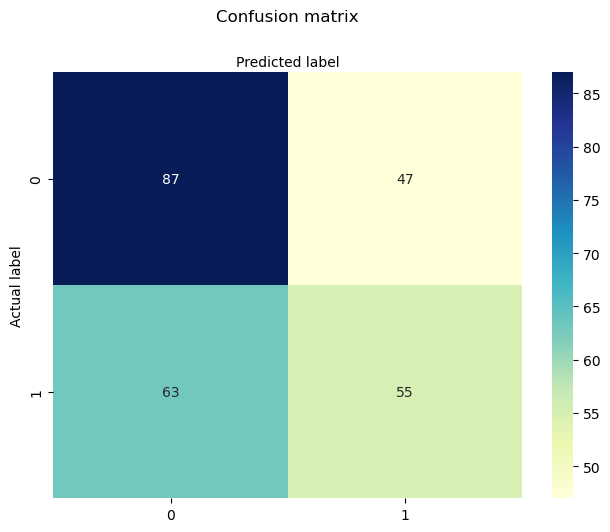

In [218]:
class_names=[0,1]
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_nbv), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [219]:
target_names = ['without asd', 'with asd']
print(classification_report(y_test_nbv, y_pred_nbv, target_names=target_names))

              precision    recall  f1-score   support

 without asd       0.58      0.65      0.61       134
    with asd       0.54      0.47      0.50       118

    accuracy                           0.56       252
   macro avg       0.56      0.56      0.56       252
weighted avg       0.56      0.56      0.56       252



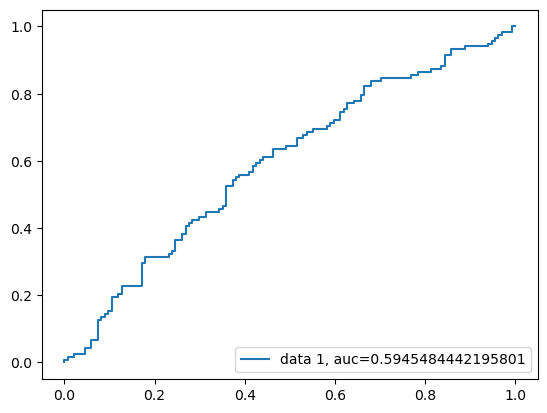

In [220]:
y_pred_proba_nbv = logreg.predict_proba(X_test_nbv)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_nbv, y_pred_proba_nbv)
auc = metrics.roc_auc_score(y_test_nbv, y_pred_proba_nbv)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [263]:
cijeli_train = data_train[[col for col in data_train.columns if col.startswith('anatomy') or col.startswith('participants')]]
cijeli_train #set sa anatomijom i participants

df2 = pd.DataFrame(cijeli_train)
df2['participants_sex'] = df2['participants_sex'].replace({'F': 1, 'M': 0})
# Filter the DataFrame where quality_selector is 1
filtered_df2 = df2[df2['anatomy_select'].isin([1, 2])]

filtered_df2 #odabrani samo kvalitetni uzorci

C:\Users\lanab\AppData\Local\Temp\ipykernel_16848\512552882.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['participants_sex'] = df2['participants_sex'].replace({'F': 1, 'M': 0})


,participants_site,participants_sex,participants_age,participants_asd,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,5,1,9.301370,0,977.0,427.0,1884.0,1449.0,463.0,2790.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,19,0,29.000000,0,1279.0,730.0,2419.0,1611.0,467.0,3562.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,19,1,45.000000,1,926.0,446.0,1897.0,2135.0,570.0,3064.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,5,1,9.216438,1,983.0,588.0,2479.0,1312.0,525.0,3766.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,28,0,15.050000,1,1488.0,593.0,2309.0,1829.0,726.0,3720.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,28,0,19.330000,0,805.0,902.0,3298.0,1851.0,736.0,4008.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,3,1,46.430000,0,813.0,544.0,2499.0,1357.0,617.0,3346.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,12,0,14.083333,0,1107.0,518.0,2649.0,1856.0,567.0,3018.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [264]:
y_sve = filtered_df2.participants_asd #target variable
y_sve
# Select all columns that start with 'anatomy' as features
X_sve = filtered_df2[[col for col in filtered_df2.columns if not (col.startswith('participants_asd'))]]
X_sve

,participants_site,participants_sex,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,5,1,9.301370,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,19,0,29.000000,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,19,1,45.000000,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,5,1,9.216438,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,28,0,15.050000,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,28,0,19.330000,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,3,1,46.430000,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,12,0,14.083333,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [265]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
skaliran_sve = scaler.fit_transform(X_sve)

# Convert the scaled features back to a DataFrame for easier handling
skaliran_sve_df = pd.DataFrame(skaliran_sve, columns=X_sve.columns, index=X_sve.index)
skaliran_sve_df

,participants_site,participants_sex,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,-1.167978,2.016266,-0.804370,-0.552148,-1.580710,-1.440316,-0.590172,-0.116118,-1.322757,-1.073410,...,-1.211371,0.368197,-0.133116,-0.679366,-0.668177,-0.682701,-1.594504,-1.594504,-1.206807,-0.297578
5174041730092253771,0.173044,-0.495966,1.163646,0.881002,0.426686,-0.166161,0.048096,-0.078398,0.484040,0.590798,...,0.412412,-0.547561,-0.437300,-0.372986,-0.199392,-0.289891,1.138204,1.138204,0.596753,-0.297578
10219322676643534800,0.173044,2.016266,2.762147,-0.794170,-1.454834,-1.409356,2.112616,0.892908,-0.681484,-0.114134,...,-0.660152,-0.509643,-0.101208,-0.311710,-0.280920,-0.300228,-0.842382,-0.842382,-1.116108,-0.297578
10645466564919190227,-1.167978,2.016266,-0.812856,-0.523675,-0.514074,-0.023265,-1.129941,0.468551,0.961484,0.217675,...,-0.574320,0.433977,-0.092052,-0.168732,-0.138246,-0.155508,-0.730470,-0.730470,-0.300295,-0.297578
14512541342641936232,1.035130,-0.495966,-0.230046,1.872819,-0.480948,-0.428137,0.907000,2.364012,0.853825,0.657935,...,0.153625,-0.251289,-0.090655,-0.842769,-0.443976,-0.651690,0.301466,0.301466,0.154761,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,1.035130,-0.495966,0.197553,-1.368380,1.566198,1.927263,0.993678,2.458314,1.527863,-0.341365,...,0.608312,-0.763860,-0.349880,-0.699791,-0.729323,-0.724050,1.303717,1.303717,0.593425,-0.297578
14661172306020020468,-1.359553,2.016266,2.905013,-1.330416,-0.805577,0.024366,-0.952645,1.336126,-0.021489,-1.535619,...,-0.188580,-0.593975,-0.257572,0.627857,0.432450,0.537079,0.016529,0.016529,-0.374535,-0.297578
7789126193351344754,-0.497467,-0.495966,-0.326622,0.064771,-0.977829,0.381606,1.013377,0.864618,-0.789143,-0.310379,...,-0.294521,0.044944,-0.333482,-0.230008,-0.117864,-0.176182,-0.044492,-0.044492,0.050951,-0.297578


In [266]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train_sve, X_test_sve, y_train_sve, y_test_sve = train_test_split(skaliran_sve_df, y_sve, test_size=0.25, random_state=16)
X_test_sve

,participants_site,participants_sex,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
3513534968964187215,1.322492,-0.495966,-0.654648,0.278320,0.333935,-0.230465,-0.594112,1.128662,-0.220424,-0.275520,...,-0.589711,0.100653,-0.251493,0.505305,0.350922,0.433708,-0.572987,-0.572987,-0.375922,-0.297578
16392617381180084180,1.418279,-0.495966,-0.294985,-0.547403,-0.739326,0.865071,0.217513,1.062651,0.622124,0.101477,...,0.251555,0.540315,0.298065,0.648282,0.473214,0.568090,-0.025195,-0.025195,0.475116,-0.297578
805048801547934547,-1.167978,-0.495966,-0.625634,1.540631,0.333935,0.331593,1.182794,1.072081,0.254680,2.012283,...,0.171974,0.548678,-0.055498,-0.556814,-0.688559,-0.631016,0.283938,0.283938,0.751849,-0.297578
7643199759602744603,1.418279,-0.495966,-0.414873,1.137261,-1.004329,-0.323347,0.055976,1.685041,0.285105,-0.231623,...,-0.461535,-0.454892,-0.616532,0.607431,0.819708,0.723147,0.064432,0.064432,-0.251831,-0.297578
3792180006359000357,0.268832,-0.495966,-0.688616,2.931072,0.307435,-0.699639,-0.188299,-1.266597,0.895952,1.714042,...,0.186667,0.009336,-0.562203,-0.475112,-0.484740,-0.486296,0.976621,0.976621,0.758444,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005987433942226638,1.322492,2.016266,-0.354929,-1.724295,-1.295832,-0.806811,-0.921125,-0.691358,-1.271268,-2.212148,...,-1.734614,-0.198600,-0.332910,0.158074,-0.056718,0.051234,-2.158340,-2.158340,-2.093485,-0.297578
7179331416123524154,-0.784829,-0.495966,-0.934385,2.328390,0.784440,1.929645,0.643025,2.137689,1.073824,1.453243,...,0.647946,0.188753,-0.290381,-0.372986,-0.036336,-0.207194,1.277404,1.277404,1.300378,-0.297578
2848232240603600516,0.268832,2.016266,0.538233,0.264083,-0.759201,-1.483185,-2.051884,-0.116118,-0.833611,-1.095359,...,-0.973904,-0.407218,-0.051375,-0.638515,-0.810851,-0.734387,-1.339440,-1.339440,-1.543407,-0.297578


In [267]:
#model development and prediction
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500)

#fit the model with data
logreg.fit(X_train_sve, y_train_sve)
y_pred_sve = logreg.predict(X_test_sve)

cnf_matrix_sve = metrics.confusion_matrix(y_test_sve, y_pred_sve)
cnf_matrix_sve

array([[86, 48],
       [56, 62]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

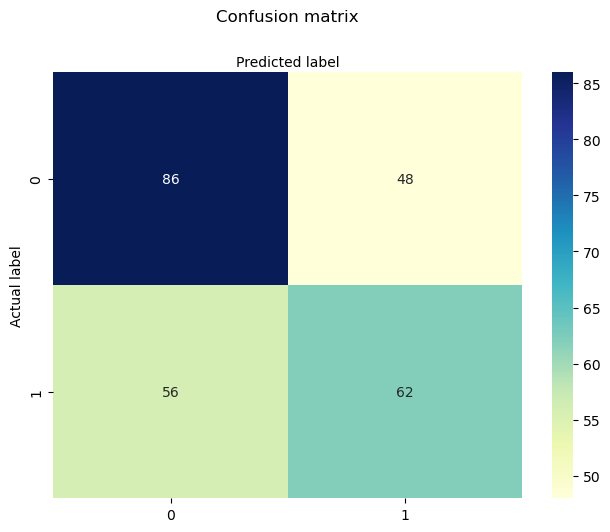

In [268]:
class_names=[0,1]
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_sve), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [269]:
target_names = ['without asd', 'with asd']
print(classification_report(y_test_sve, y_pred_sve, target_names=target_names))

              precision    recall  f1-score   support

 without asd       0.61      0.64      0.62       134
    with asd       0.56      0.53      0.54       118

    accuracy                           0.59       252
   macro avg       0.58      0.58      0.58       252
weighted avg       0.59      0.59      0.59       252



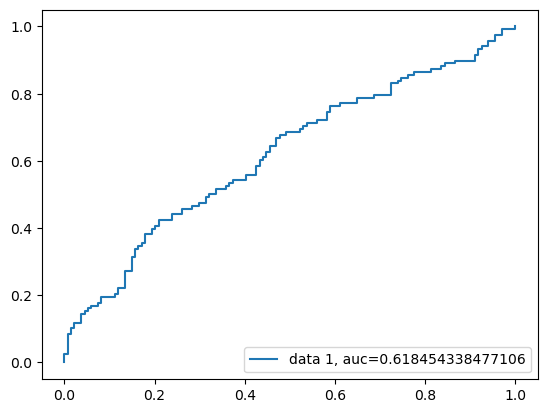

In [270]:
y_pred_proba_sve = logreg.predict_proba(X_test_sve)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_sve, y_pred_proba_sve)
auc = metrics.roc_auc_score(y_test_sve, y_pred_proba_sve)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [236]:
y_age = filtered_df2.participants_asd #target variable
y_age
# Select all columns that start with 'anatomy' as features
X_age = filtered_df2[[col for col in filtered_df2.columns if not (col.startswith('participants_asd') or col.startswith('participants_sex') or col.startswith('participants_site'))]]
X_age

,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,9.301370,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,29.000000,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,45.000000,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,9.216438,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,15.050000,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,19.330000,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,4179.0,1246.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,46.430000,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,14.083333,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [237]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
skaliran_age = scaler.fit_transform(X_age)

# Convert the scaled features back to a DataFrame for easier handling
skaliran_age_df = pd.DataFrame(skaliran_age, columns=X_age.columns, index=X_age.index)
skaliran_age_df

,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,-0.804370,-0.552148,-1.580710,-1.440316,-0.590172,-0.116118,-1.322757,-1.073410,-0.619476,-1.232087,...,-1.211371,0.368197,-0.133116,-0.679366,-0.668177,-0.682701,-1.594504,-1.594504,-1.206807,-0.297578
5174041730092253771,1.163646,0.881002,0.426686,-0.166161,0.048096,-0.078398,0.484040,0.590798,-0.179376,0.163380,...,0.412412,-0.547561,-0.437300,-0.372986,-0.199392,-0.289891,1.138204,1.138204,0.596753,-0.297578
10219322676643534800,2.762147,-0.794170,-1.454834,-1.409356,2.112616,0.892908,-0.681484,-0.114134,-1.857038,0.249920,...,-0.660152,-0.509643,-0.101208,-0.311710,-0.280920,-0.300228,-0.842382,-0.842382,-1.116108,-0.297578
10645466564919190227,-0.812856,-0.523675,-0.514074,-0.023265,-1.129941,0.468551,0.961484,0.217675,-0.394145,-0.523536,...,-0.574320,0.433977,-0.092052,-0.168732,-0.138246,-0.155508,-0.730470,-0.730470,-0.300295,-0.297578
14512541342641936232,-0.230046,1.872819,-0.480948,-0.428137,0.907000,2.364012,0.853825,0.657935,0.526545,-0.496492,...,0.153625,-0.251289,-0.090655,-0.842769,-0.443976,-0.651690,0.301466,0.301466,0.154761,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,0.197553,-1.368380,1.566198,1.927263,0.993678,2.458314,1.527863,-0.341365,0.919115,0.655579,...,0.608312,-0.763860,-0.349880,-0.699791,-0.729323,-0.724050,1.303717,1.303717,0.593425,-0.297578
14661172306020020468,2.905013,-1.330416,-0.805577,0.024366,-0.952645,1.336126,-0.021489,-1.535619,-1.527843,-1.096868,...,-0.188580,-0.593975,-0.257572,0.627857,0.432450,0.537079,0.016529,0.016529,-0.374535,-0.297578
7789126193351344754,-0.326622,0.064771,-0.977829,0.381606,1.013377,0.864618,-0.789143,-0.310379,1.065228,1.418218,...,-0.294521,0.044944,-0.333482,-0.230008,-0.117864,-0.176182,-0.044492,-0.044492,0.050951,-0.297578


In [238]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(skaliran_age_df, y_age, test_size=0.25, random_state=16)
X_test_age

,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
3513534968964187215,-0.654648,0.278320,0.333935,-0.230465,-0.594112,1.128662,-0.220424,-0.275520,-0.476884,0.157971,...,-0.589711,0.100653,-0.251493,0.505305,0.350922,0.433708,-0.572987,-0.572987,-0.375922,-0.297578
16392617381180084180,-0.294985,-0.547403,-0.739326,0.865071,0.217513,1.062651,0.622124,0.101477,0.077643,-0.674982,...,0.251555,0.540315,0.298065,0.648282,0.473214,0.568090,-0.025195,-0.025195,0.475116,-0.297578
805048801547934547,-0.625634,1.540631,0.333935,0.331593,1.182794,1.072081,0.254680,2.012283,1.315205,1.391174,...,0.171974,0.548678,-0.055498,-0.556814,-0.688559,-0.631016,0.283938,0.283938,0.751849,-0.297578
7643199759602744603,-0.414873,1.137261,-1.004329,-0.323347,0.055976,1.685041,0.285105,-0.231623,-0.017419,-0.729070,...,-0.461535,-0.454892,-0.616532,0.607431,0.819708,0.723147,0.064432,0.064432,-0.251831,-0.297578
3792180006359000357,-0.688616,2.931072,0.307435,-0.699639,-0.188299,-1.266597,0.895952,1.714042,0.179746,0.785390,...,0.186667,0.009336,-0.562203,-0.475112,-0.484740,-0.486296,0.976621,0.976621,0.758444,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005987433942226638,-0.354929,-1.724295,-1.295832,-0.806811,-0.921125,-0.691358,-1.271268,-2.212148,-1.990829,-1.708061,...,-1.734614,-0.198600,-0.332910,0.158074,-0.056718,0.051234,-2.158340,-2.158340,-2.093485,-0.297578
7179331416123524154,-0.934385,2.328390,0.784440,1.929645,0.643025,2.137689,1.073824,1.453243,1.836284,0.087657,...,0.647946,0.188753,-0.290381,-0.372986,-0.036336,-0.207194,1.277404,1.277404,1.300378,-0.297578
2848232240603600516,0.538233,0.264083,-0.759201,-1.483185,-2.051884,-0.116118,-0.833611,-1.095359,-0.501529,-1.513344,...,-0.973904,-0.407218,-0.051375,-0.638515,-0.810851,-0.734387,-1.339440,-1.339440,-1.543407,-0.297578


In [239]:
#model development and prediction
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500)

#fit the model with data
logreg.fit(X_train_age, y_train_age)
y_pred_age = logreg.predict(X_test_age)

cnf_matrix_age = metrics.confusion_matrix(y_test_age, y_pred_age)
cnf_matrix_age

array([[88, 46],
       [56, 62]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

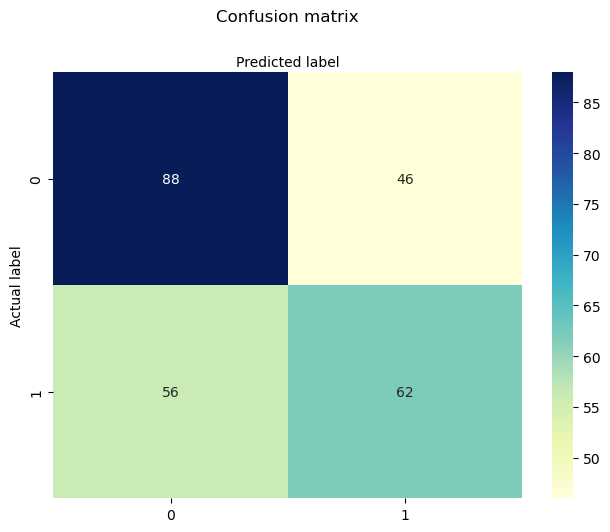

In [240]:
class_names=[0,1]
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_age), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [241]:
target_names = ['without asd', 'with asd']
print(classification_report(y_test_age, y_pred_age, target_names=target_names))

              precision    recall  f1-score   support

 without asd       0.61      0.66      0.63       134
    with asd       0.57      0.53      0.55       118

    accuracy                           0.60       252
   macro avg       0.59      0.59      0.59       252
weighted avg       0.59      0.60      0.59       252



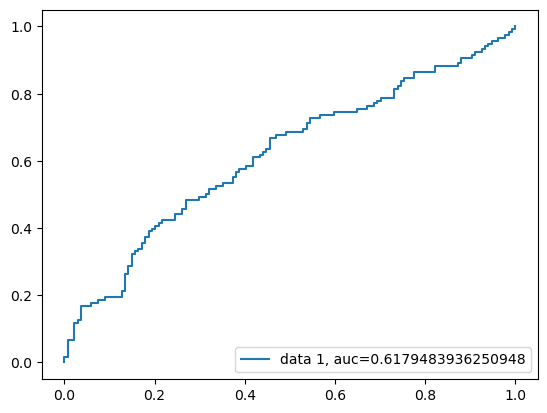

In [242]:
y_pred_proba_age = logreg.predict_proba(X_test_age)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_age, y_pred_proba_age)
auc = metrics.roc_auc_score(y_test_age, y_pred_proba_age)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [254]:
cijeli_train2 = data_train[[col for col in data_train.columns if col.startswith('anatomy') or col.startswith('participants')]]
cijeli_train2 #set sa anatomijom i participants

df3 = pd.DataFrame(cijeli_train2)
df3['participants_sex'] = df3['participants_sex'].replace({'F': 1, 'M': 0})
# Filter the DataFrame where quality_selector is 1
filtered_df3 = df3[df3['anatomy_select'].isin([1, 2])]

filtered_df3 #odabrani samo kvalitetni uzorci

C:\Users\lanab\AppData\Local\Temp\ipykernel_16848\807458952.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['participants_sex'] = df3['participants_sex'].replace({'F': 1, 'M': 0})


,participants_site,participants_sex,participants_age,participants_asd,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,5,1,9.301370,0,977.0,427.0,1884.0,1449.0,463.0,2790.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,19,0,29.000000,0,1279.0,730.0,2419.0,1611.0,467.0,3562.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,19,1,45.000000,1,926.0,446.0,1897.0,2135.0,570.0,3064.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,5,1,9.216438,1,983.0,588.0,2479.0,1312.0,525.0,3766.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,28,0,15.050000,1,1488.0,593.0,2309.0,1829.0,726.0,3720.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,28,0,19.330000,0,805.0,902.0,3298.0,1851.0,736.0,4008.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,3,1,46.430000,0,813.0,544.0,2499.0,1357.0,617.0,3346.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,12,0,14.083333,0,1107.0,518.0,2649.0,1856.0,567.0,3018.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [256]:
y_sex = filtered_df3.participants_asd #target variable
y_sex
# Select all columns that start with 'anatomy' as features
X_sex = filtered_df3[[col for col in filtered_df3.columns if not (col.startswith('participants_asd') or col.startswith('participants_age') or col.startswith('participants_site'))]]
X_sex

,participants_sex,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,1,977.0,427.0,1884.0,1449.0,463.0,2790.0,4091.0,3305.0,897.0,...,1375171.0,0.840976,1.077472,30.0,31.0,61.0,1.276294e+06,1.276294e+06,1058903.0,1
5174041730092253771,0,1279.0,730.0,2419.0,1611.0,467.0,3562.0,5380.0,3555.0,1155.0,...,1807924.0,0.771229,1.033285,45.0,54.0,99.0,1.749685e+06,1.749685e+06,1329340.0,1
10219322676643534800,1,926.0,446.0,1897.0,2135.0,570.0,3064.0,4834.0,2602.0,1171.0,...,1522076.0,0.774117,1.082107,48.0,50.0,98.0,1.406585e+06,1.406585e+06,1072503.0,1
10645466564919190227,1,983.0,588.0,2479.0,1312.0,525.0,3766.0,5091.0,3433.0,1028.0,...,1544951.0,0.845986,1.083437,55.0,57.0,112.0,1.425972e+06,1.425972e+06,1194831.0,1
14512541342641936232,0,1488.0,593.0,2309.0,1829.0,726.0,3720.0,5432.0,3956.0,1033.0,...,1738955.0,0.793794,1.083640,22.0,42.0,64.0,1.604735e+06,1.604735e+06,1263065.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,0,805.0,902.0,3298.0,1851.0,736.0,4008.0,4658.0,4179.0,1246.0,...,1860133.0,0.754755,1.045984,29.0,28.0,57.0,1.778357e+06,1.778357e+06,1328841.0,1
14661172306020020468,1,813.0,544.0,2499.0,1357.0,617.0,3346.0,3733.0,2789.0,922.0,...,1647754.0,0.767694,1.059393,94.0,85.0,179.0,1.555375e+06,1.555375e+06,1183699.0,1
7789126193351344754,0,1107.0,518.0,2649.0,1856.0,567.0,3018.0,4682.0,4262.0,1387.0,...,1619520.0,0.816356,1.048366,52.0,58.0,110.0,1.544805e+06,1.544805e+06,1247499.0,1


In [257]:
#skaliranje
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
skaliran_sex = scaler.fit_transform(X_sex)

# Convert the scaled features back to a DataFrame for easier handling
skaliran_sex_df = pd.DataFrame(skaliran_sex, columns=X_sex.columns, index=X_sex.index)
skaliran_sex_df

,participants_sex,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,2.016266,-0.552148,-1.580710,-1.440316,-0.590172,-0.116118,-1.322757,-1.073410,-0.619476,-1.232087,...,-1.211371,0.368197,-0.133116,-0.679366,-0.668177,-0.682701,-1.594504,-1.594504,-1.206807,-0.297578
5174041730092253771,-0.495966,0.881002,0.426686,-0.166161,0.048096,-0.078398,0.484040,0.590798,-0.179376,0.163380,...,0.412412,-0.547561,-0.437300,-0.372986,-0.199392,-0.289891,1.138204,1.138204,0.596753,-0.297578
10219322676643534800,2.016266,-0.794170,-1.454834,-1.409356,2.112616,0.892908,-0.681484,-0.114134,-1.857038,0.249920,...,-0.660152,-0.509643,-0.101208,-0.311710,-0.280920,-0.300228,-0.842382,-0.842382,-1.116108,-0.297578
10645466564919190227,2.016266,-0.523675,-0.514074,-0.023265,-1.129941,0.468551,0.961484,0.217675,-0.394145,-0.523536,...,-0.574320,0.433977,-0.092052,-0.168732,-0.138246,-0.155508,-0.730470,-0.730470,-0.300295,-0.297578
14512541342641936232,-0.495966,1.872819,-0.480948,-0.428137,0.907000,2.364012,0.853825,0.657935,0.526545,-0.496492,...,0.153625,-0.251289,-0.090655,-0.842769,-0.443976,-0.651690,0.301466,0.301466,0.154761,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589489344450896135,-0.495966,-1.368380,1.566198,1.927263,0.993678,2.458314,1.527863,-0.341365,0.919115,0.655579,...,0.608312,-0.763860,-0.349880,-0.699791,-0.729323,-0.724050,1.303717,1.303717,0.593425,-0.297578
14661172306020020468,2.016266,-1.330416,-0.805577,0.024366,-0.952645,1.336126,-0.021489,-1.535619,-1.527843,-1.096868,...,-0.188580,-0.593975,-0.257572,0.627857,0.432450,0.537079,0.016529,0.016529,-0.374535,-0.297578
7789126193351344754,-0.495966,0.064771,-0.977829,0.381606,1.013377,0.864618,-0.789143,-0.310379,1.065228,1.418218,...,-0.294521,0.044944,-0.333482,-0.230008,-0.117864,-0.176182,-0.044492,-0.044492,0.050951,-0.297578


In [258]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(skaliran_sex_df, y_sex, test_size=0.25, random_state=16)
X_test_sex

,participants_sex,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,anatomy_lh_inferiortemporal_area,anatomy_lh_isthmuscingulate_area,...,anatomy_MaskVol,anatomy_BrainSegVol-to-eTIV,anatomy_MaskVol-to-eTIV,anatomy_lhSurfaceHoles,anatomy_rhSurfaceHoles,anatomy_SurfaceHoles,anatomy_EstimatedTotalIntraCranialVol,anatomy_eTIV,anatomy_BrainSegVolNotVent,anatomy_select
subject_id,,,,,,,,,,,,,,,,,,,,,
3513534968964187215,-0.495966,0.278320,0.333935,-0.230465,-0.594112,1.128662,-0.220424,-0.275520,-0.476884,0.157971,...,-0.589711,0.100653,-0.251493,0.505305,0.350922,0.433708,-0.572987,-0.572987,-0.375922,-0.297578
16392617381180084180,-0.495966,-0.547403,-0.739326,0.865071,0.217513,1.062651,0.622124,0.101477,0.077643,-0.674982,...,0.251555,0.540315,0.298065,0.648282,0.473214,0.568090,-0.025195,-0.025195,0.475116,-0.297578
805048801547934547,-0.495966,1.540631,0.333935,0.331593,1.182794,1.072081,0.254680,2.012283,1.315205,1.391174,...,0.171974,0.548678,-0.055498,-0.556814,-0.688559,-0.631016,0.283938,0.283938,0.751849,-0.297578
7643199759602744603,-0.495966,1.137261,-1.004329,-0.323347,0.055976,1.685041,0.285105,-0.231623,-0.017419,-0.729070,...,-0.461535,-0.454892,-0.616532,0.607431,0.819708,0.723147,0.064432,0.064432,-0.251831,-0.297578
3792180006359000357,-0.495966,2.931072,0.307435,-0.699639,-0.188299,-1.266597,0.895952,1.714042,0.179746,0.785390,...,0.186667,0.009336,-0.562203,-0.475112,-0.484740,-0.486296,0.976621,0.976621,0.758444,-0.297578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005987433942226638,2.016266,-1.724295,-1.295832,-0.806811,-0.921125,-0.691358,-1.271268,-2.212148,-1.990829,-1.708061,...,-1.734614,-0.198600,-0.332910,0.158074,-0.056718,0.051234,-2.158340,-2.158340,-2.093485,-0.297578
7179331416123524154,-0.495966,2.328390,0.784440,1.929645,0.643025,2.137689,1.073824,1.453243,1.836284,0.087657,...,0.647946,0.188753,-0.290381,-0.372986,-0.036336,-0.207194,1.277404,1.277404,1.300378,-0.297578
2848232240603600516,2.016266,0.264083,-0.759201,-1.483185,-2.051884,-0.116118,-0.833611,-1.095359,-0.501529,-1.513344,...,-0.973904,-0.407218,-0.051375,-0.638515,-0.810851,-0.734387,-1.339440,-1.339440,-1.543407,-0.297578


In [259]:
#model development and prediction
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500)

#fit the model with data
logreg.fit(X_train_sex, y_train_sex)
y_pred_sex = logreg.predict(X_test_sex)

cnf_matrix_sex = metrics.confusion_matrix(y_test_sex, y_pred_sex)
cnf_matrix_sex

array([[84, 50],
       [54, 64]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

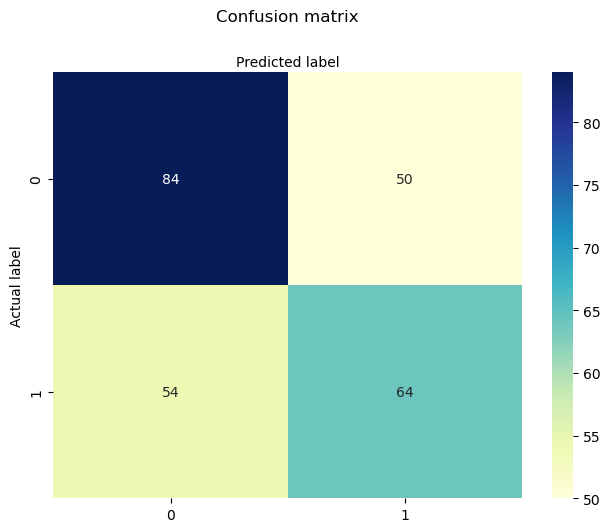

In [260]:
class_names=[0,1]
fig, ax= plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_sex), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [261]:
target_names = ['without asd', 'with asd']
print(classification_report(y_test_sex, y_pred_sex, target_names=target_names))

              precision    recall  f1-score   support

 without asd       0.61      0.63      0.62       134
    with asd       0.56      0.54      0.55       118

    accuracy                           0.59       252
   macro avg       0.59      0.58      0.58       252
weighted avg       0.59      0.59      0.59       252



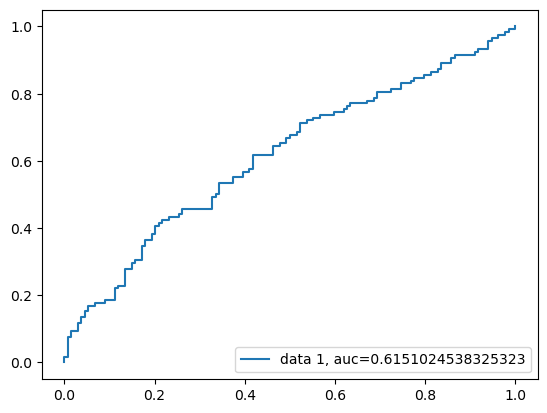

In [262]:
y_pred_proba_sex = logreg.predict_proba(X_test_sex)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_sex, y_pred_proba_sex)
auc = metrics.roc_auc_score(y_test_sex, y_pred_proba_sex)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).